# Data Science Job Salaries
(https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries)

In this notebook we are performing exploratory analysis on a dataset about data science salaries as well as create a DS Salary predictor based on synthetic data generated by a Conditional GAN model. 

### Data Loading and Initial Exploration

In [1]:
import pandas as pd

df = pd.read_excel(r'DS_salaries_data\ds_salaries.xlsx') #Load the dataset

In [2]:
df.shape #What is the size of the dataset

(607, 11)

In [3]:
df.head(10) #Let's take the head of our data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


We see that company locations are in 2 letters format. We need the whole country name for later use

In [5]:
#Load dataset that contains the country names per 2-letters code
country_codes = pd.read_excel(r'DS_salaries_data\country_codes.xlsx')

In [6]:
new_df = pd.merge(df, country_codes[['country', 'country_code_2']], how='left', left_on='company_location', right_on='country_code_2')

In [7]:
new_df.shape #What is the new size of our dataset

(607, 13)

In [8]:
new_df.head(10) #Let's print the first 10 rows once more

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,country,country_code_2
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,Germany,DE
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,Japan,JP
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,United Kingdom of Great Britain and Northern I...,GB
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,Honduras,HN
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,United States of America (the),US
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L,United States of America (the),US
6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S,United States of America (the),US
7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L,Hungary,HU
8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L,United States of America (the),US
9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S,New Zealand,NZ


In [9]:
new_df.drop(['country_code_2'], inplace=True, axis=1) #We have no use for the country_code_2 column

In [10]:
occurences = new_df['country'].value_counts() #How many times each country appears in our data?

### DS Salaries in USD vs GDP per Capita

We will compare the DS salaries with the GDP per capita on a country level basis. Reason is that the GDP per capita is a fair metric that shows the average amount each person is earning. 

Hence for this analysis we need to exclude the countries appearing less than 10 times so to have an as far as possible unbiased estmate of the average salary that data scientists receive per country.

In [11]:
countries = occurences[occurences > 10]

In [12]:
df_bck = df.copy() #Save the initial data for later use

In [13]:
#Remove countries appearing less than 10 times from our data
df = new_df.loc[new_df['country'].isin(list(countries.index))]

In [14]:
df.shape #We removed 83 rows (607 - 524).

(524, 12)

In [15]:
# Show the average salary in USD per country
df[['country', 'salary_in_usd']].groupby(['country']).agg('mean').sort_values(by=['salary_in_usd'], ascending=False).round(2)

,salary_in_usd
country,
United States of America (the),144055.26
Canada,99823.73
Germany,81887.21
United Kingdom of Great Britain and Northern Ireland (the),81583.04
France,63970.67
Spain,53060.14
Greece,52293.09
India,28581.75


In [16]:
# Show the number of available salaries per country in our dataset
df[['country', 'salary_in_usd']].groupby(['country']).agg('count').sort_values(by=['salary_in_usd'], ascending=False)

,salary_in_usd
country,
United States of America (the),355
United Kingdom of Great Britain and Northern Ireland (the),47
Canada,30
Germany,28
India,24
France,15
Spain,14
Greece,11


In [17]:
#Dataset from https://worldpopulationreview.com/country-rankings/median-income-by-country
average_wage = pd.read_csv(r'DS_salaries_data\yearly_income_per_country.csv')

In [18]:
average_wage.head(10) #Lets print the first 10 rows from the dataset

,country,medianIncome,meanIncome,gdpPerCapitaPPP,pop2022
0,Luxembourg,26321,31376,124590,642.371
1,United Arab Emirates,24292,27017,70089,10081.785
2,Norway,22684,25272,70005,5511.370
3,Switzerland,21490,25787,72376,8773.637
4,United States,19306,25332,65297,334805.269
5,Canada,18652,22042,51668,38388.419
6,Austria,18405,20718,60418,9066.710
7,Sweden,17625,20193,56632,10218.971
8,Denmark,17432,20304,62089,5834.950
9,Netherlands,17154,19690,61285,17211.447


In [19]:
mean_salaries_per_country_in_dataset = df[['country', 'salary_in_usd']].groupby(['country']).agg('mean').sort_values(by=['salary_in_usd'], ascending=False).round(2)

In [20]:
mean_salaries_per_country_in_dataset.reset_index(inplace=True)

Some preprocessing is needed fefore we can make use of our newly fetched data. Namely we have to change the name for US, UK since they differ between the 2 datasets

In [21]:
mean_salaries_per_country_in_dataset['country'] = mean_salaries_per_country_in_dataset['country'].replace(['United States of America (the)'], 'United States')

In [22]:
mean_salaries_per_country_in_dataset['country'] = mean_salaries_per_country_in_dataset['country'].replace(['United Kingdom of Great Britain and Northern Ireland (the)'], 'United Kingdom')

In [23]:
mean_ds_salaries_vs_mean_salaries_overall = pd.merge(mean_salaries_per_country_in_dataset, average_wage, how='left', on='country')

In [24]:
mean_ds_salaries_vs_mean_salaries_overall

,country,salary_in_usd,medianIncome,meanIncome,gdpPerCapitaPPP,pop2022
0,United States,144055.26,19306,25332,65297,334805.269
1,Canada,99823.73,18652,22042,51668,38388.419
2,Germany,81887.21,16845,19730,57530,83883.596
3,United Kingdom,81583.04,14793,18133,49931,68497.907
4,France,63970.67,16372,19409,50992,65584.518
5,Spain,53060.14,11786,13822,43495,46719.142
6,Greece,52293.09,6936,8131,32506,10316.637
7,India,28581.75,0,1314,6996,1406631.776


Print the data sorted by the difference between DS salaries in our data and GDP per capita

In [25]:
mean_ds_salaries_vs_mean_salaries_overall['difference'] = mean_ds_salaries_vs_mean_salaries_overall['salary_in_usd'] - mean_ds_salaries_vs_mean_salaries_overall['gdpPerCapitaPPP']

In [26]:
mean_ds_salaries_vs_mean_salaries_overall[['country', 'salary_in_usd', 'gdpPerCapitaPPP', 'difference']].sort_values(by=['difference'], ascending=False)

,country,salary_in_usd,gdpPerCapitaPPP,difference
0,United States,144055.26,65297,78758.26
1,Canada,99823.73,51668,48155.73
3,United Kingdom,81583.04,49931,31652.04
2,Germany,81887.21,57530,24357.21
7,India,28581.75,6996,21585.75
6,Greece,52293.09,32506,19787.09
4,France,63970.67,50992,12978.67
5,Spain,53060.14,43495,9565.14


Seems that in the United States data scientists are getting much better paid compared to the average population.

### Visual Exploration of our data

Get the minimum salary per country

In [27]:
df[['country', 'salary_in_usd']].groupby(['country']).agg('min').sort_values(by=['salary_in_usd'], ascending=False)

,salary_in_usd
country,
Canada,52000
United Kingdom of Great Britain and Northern Ireland (the),37300
France,36643
Greece,20000
Germany,15966
Spain,10354
United States of America (the),5679
India,5409


Get the maximum salary per country

In [28]:
df[['country', 'salary_in_usd']].groupby(['country']).agg('max').sort_values(by=['salary_in_usd'], ascending=False)

,salary_in_usd
country,
United States of America (the),600000
Canada,225000
United Kingdom of Great Britain and Northern Ireland (the),183228
Germany,173762
France,152000
India,94665
Greece,87932
Spain,87932


We observe that the difference between the min and max salary in the US particularly is too big. This is why we will create scatter plots of salaries per country to give us a clearer picture of outliers

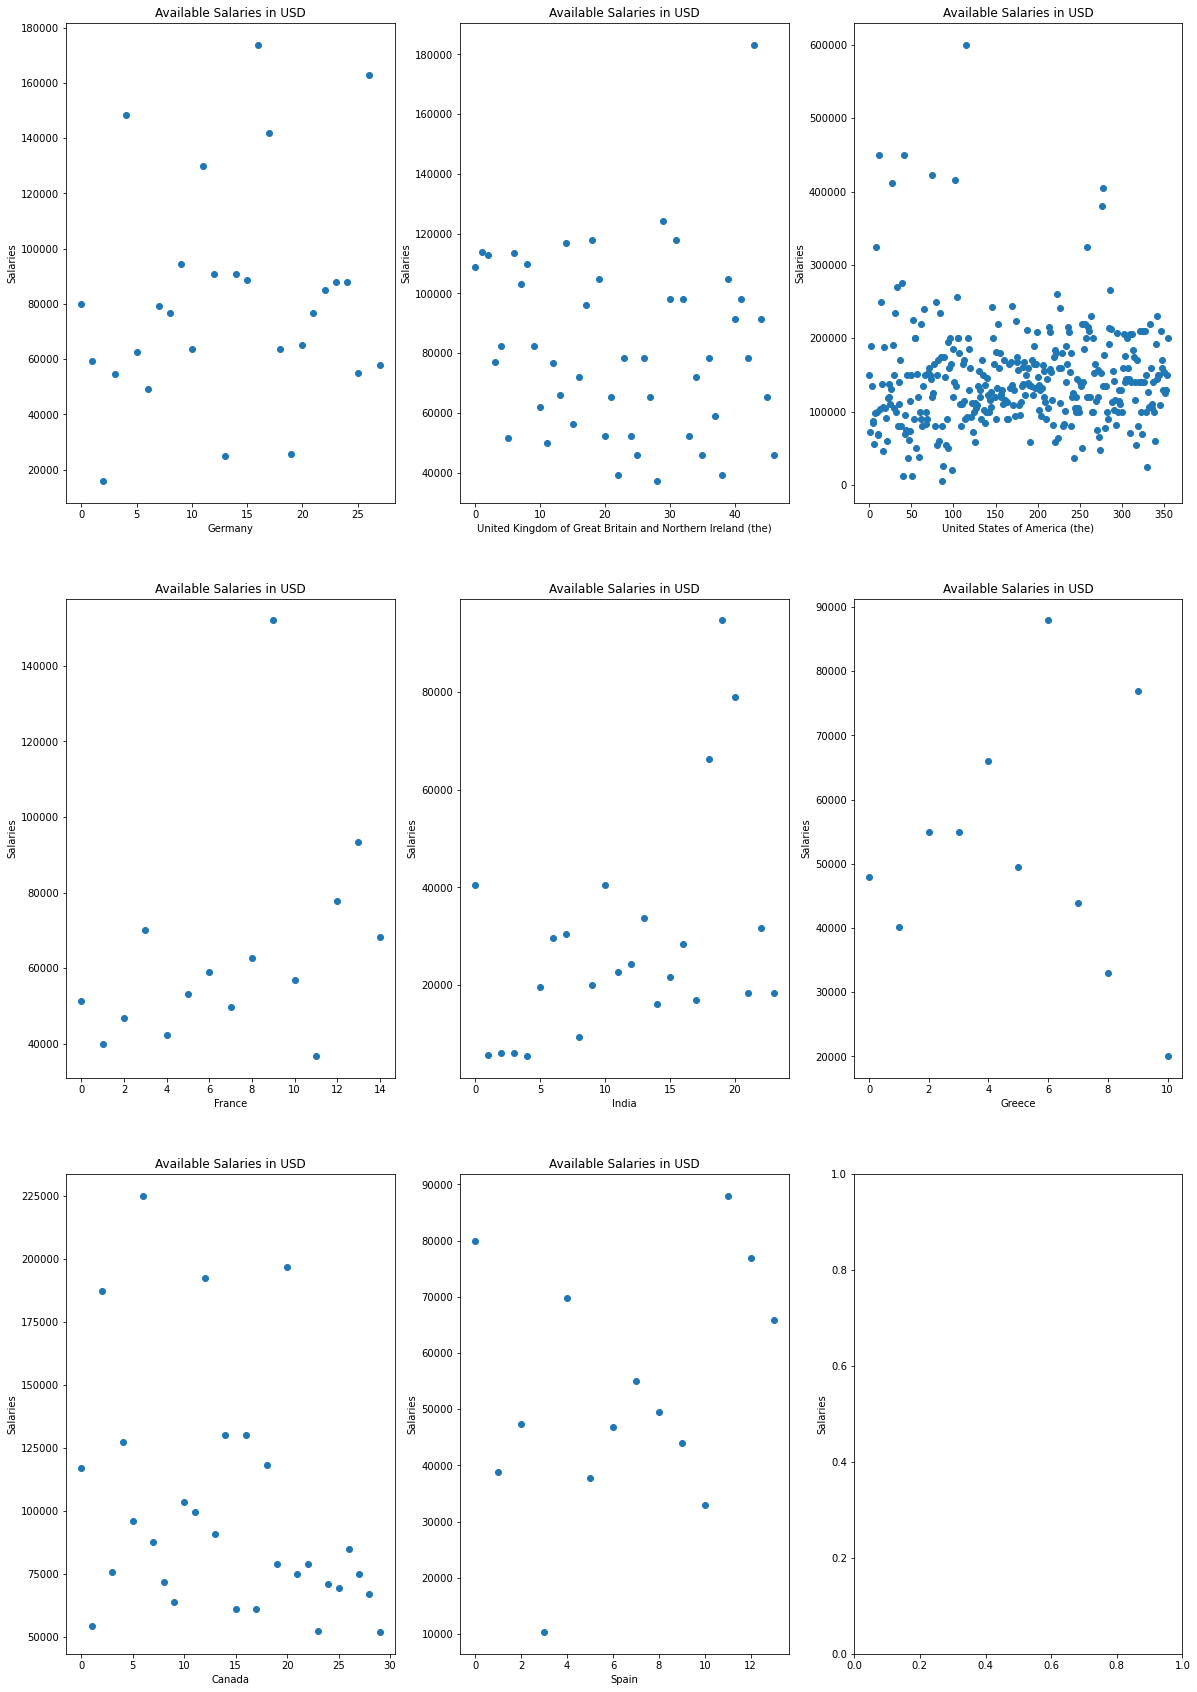

In [29]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(3, 3, figsize=(20,30))

countries = list(df['country'].unique())

j = 0
k = 0
for i in range(len(countries)):
    if i % 3 == 0 and i != 0:        
        k += 1
        j = 0    
    x = [i for i in range(df.loc[df['country']==countries[i]].shape[0])]
    y = list(df.loc[df['country']==countries[i], 'salary_in_usd'])    
    axs[k, j].scatter(x, y)
    title = 'Available Salaries in USD'
    axs[k, j].set_title(title)
    axs[k, j].set_xlabel(countries[i])
    j += 1
    
for ax in axs.flat:
    ax.set(ylabel='Salaries')

We observe that for most countries there exist some outliers. In the US most salaries are concentrated in the range between 50K and 200K but there also exist salaries that exceed 400K USD.

For the rest of the exploration we are going to use our initial data

In [30]:
del df

df = df_bck.copy()

Below we see an increase in salaries for 2022 compared to the previous 2 years. This observation seems justifiable given the current high inflation

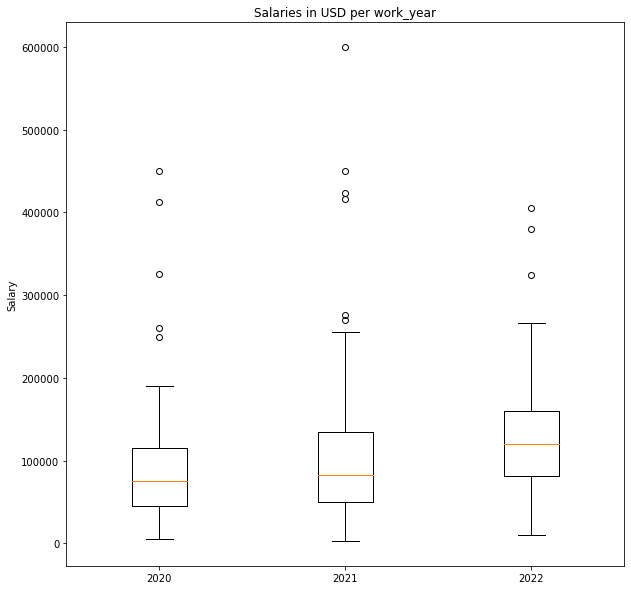

In [31]:
fig, axs = plt.subplots(figsize=(10,10))

work_year = list(df['work_year'].unique())

data = []
for i in range(len(work_year)):
    data.append(df.loc[df['work_year']==work_year[i], 'salary_in_usd'])

axs.boxplot(data)
axs.set_title('Salaries in USD per work_year')
axs.set_ylabel('Salary')
plt.xticks([1, 2, 3], work_year)
plt.show()

However there is an important consideration when it comes to plotting 2 variables vs each other. We need to have around the same amount of data per category so that our comparisons are fair. It wouldn't make sense if we only had 10 records for 2020 and 2021 working years and 597 records for 2022.

We observe that the amount of data we have increases per year

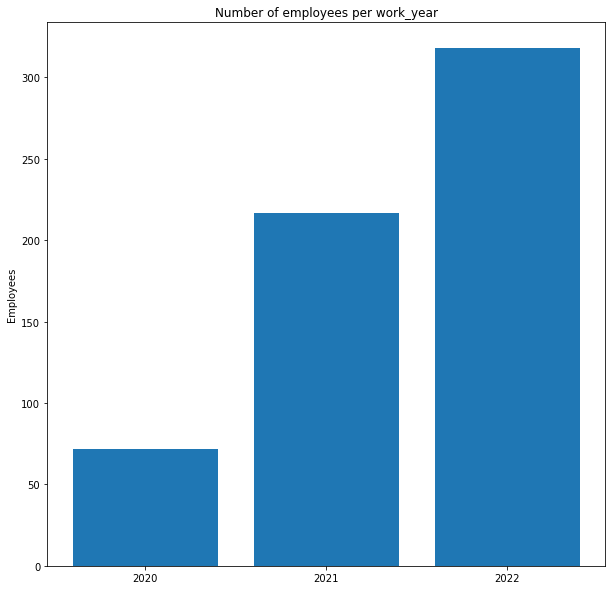

In [32]:
fig, axs = plt.subplots(figsize=(10,10))

df['work_year'] = df['work_year'].apply(str)

work_year = list(df['work_year'].unique())

data = []
for i in range(len(work_year)):               
    data.append(df.loc[df['work_year']==work_year[i]].shape[0])

axs.bar(work_year,data)
axs.set_title('Number of employees per work_year')
axs.set_ylabel('Number of Employees')
plt.show()

We see an increase in the median salary as experience level progresses, with the highest increase being from MI level to SE

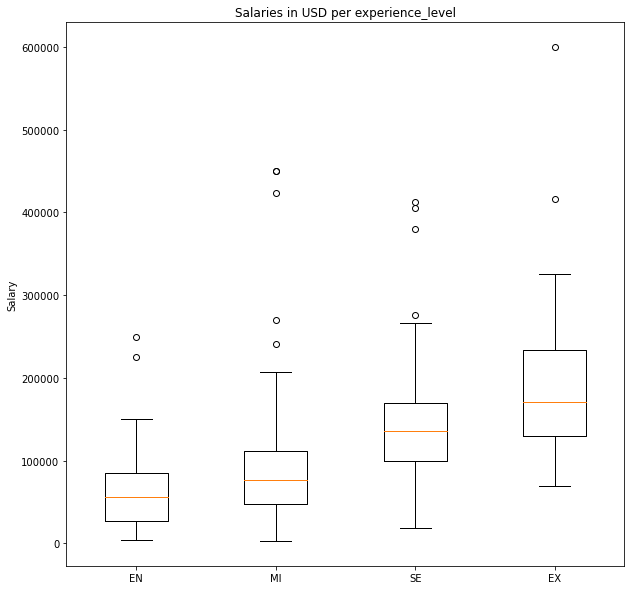

In [33]:
fig, axs = plt.subplots(figsize=(10,10))

experience_level = ['EN', 'MI', 'SE', 'EX']

data = []
for i in range(len(experience_level)):    
    data.append(df.loc[df['experience_level']==experience_level[i], 'salary_in_usd'])

axs.boxplot(data)
axs.set_title('Salaries in USD per experience_level')
axs.set_ylabel('Salary')
plt.xticks([1, 2, 3, 4], experience_level)
plt.show()

We see that for entry level and executive level we have considerably less data

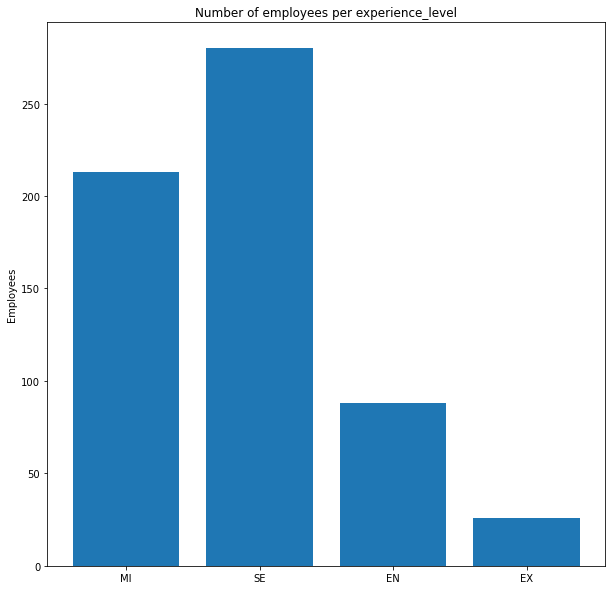

In [34]:
fig, axs = plt.subplots(figsize=(10,10))

experience_level = list(df['experience_level'].unique())

data = []
for i in range(len(experience_level)):               
    data.append(df.loc[df['experience_level']==experience_level[i]].shape[0])

axs.bar(experience_level,data)
axs.set_title('Number of employees per experience_level')
axs.set_ylabel('Number of Employees')
plt.show()

We see that the salary of employees working under contract fluctuates much more than it does for the other employment agreements

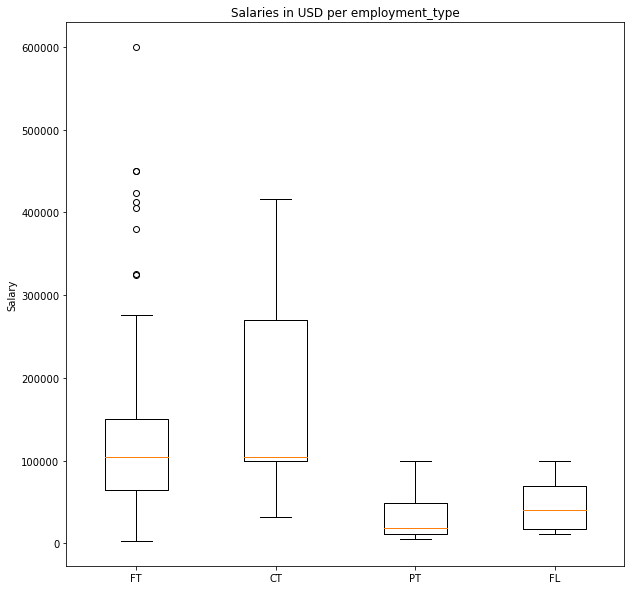

In [35]:
fig, axs = plt.subplots(figsize=(10,10))

employment_type = list(df['employment_type'].unique())

data = []
for i in range(len(employment_type)):       
    data.append(df.loc[df['employment_type']==employment_type[i], 'salary_in_usd'])

axs.boxplot(data)
axs.set_title('Salaries in USD per employment_type')
axs.set_ylabel('Salary')
plt.xticks([1, 2, 3, 4], employment_type)
plt.show()

As expected we have a lot more employees working under full time contract

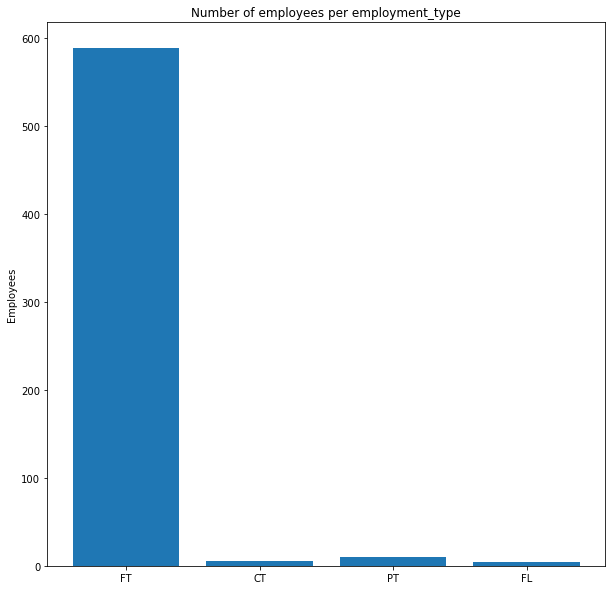

In [36]:
fig, axs = plt.subplots(figsize=(10,10))

employment_type = list(df['employment_type'].unique())

data = []
for i in range(len(employment_type)):               
    data.append(df.loc[df['employment_type']==employment_type[i]].shape[0])

axs.bar(employment_type,data)
axs.set_title('Number of employees per employment_type')
axs.set_ylabel('Number of Employees')
plt.show()

Seems that hybrid working employees are paid less compared to their colleagues

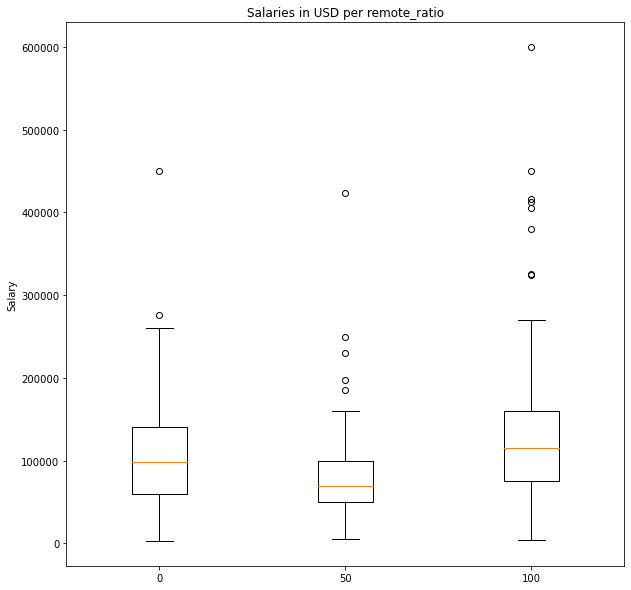

In [37]:
fig, axs = plt.subplots(figsize=(10,10))

remote_ratio = list(df['remote_ratio'].unique())

data = []
for i in range(len(remote_ratio)):           
    data.append(df.loc[df['remote_ratio']==remote_ratio[i], 'salary_in_usd'])

axs.boxplot(data)
axs.set_title('Salaries in USD per remote_ratio')
axs.set_ylabel('Salary')
plt.xticks([1, 2, 3], remote_ratio)
plt.show()

Most of the employees in our data are working exclusively at home

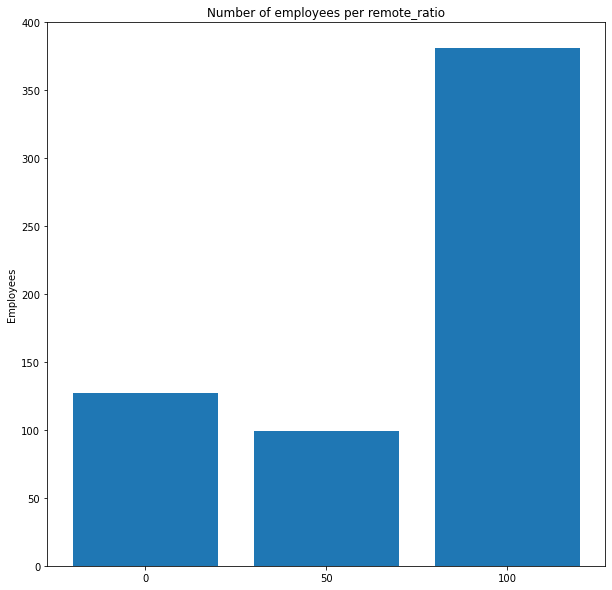

In [38]:
fig, axs = plt.subplots(figsize=(10,10))

df['remote_ratio'] = df['remote_ratio'].apply(str)

remote_ratio = list(df['remote_ratio'].unique())

data = []
for i in range(len(remote_ratio)):               
    data.append(df.loc[df['remote_ratio']==remote_ratio[i]].shape[0])

axs.bar(remote_ratio,data)
axs.set_title('Number of employees per remote_ratio')
axs.set_ylabel('Number of Employees')
plt.show()

Medium sized companies seem to be paying the most

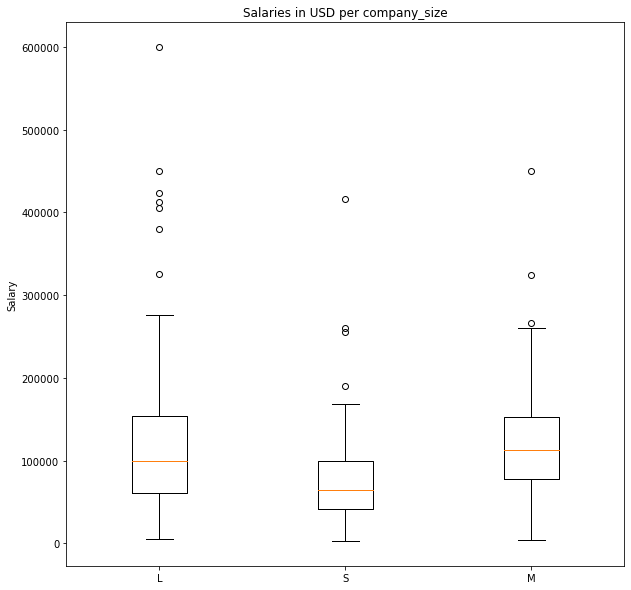

In [39]:
fig, axs = plt.subplots(figsize=(10,10))

company_size = list(df['company_size'].unique())

data = []
for i in range(len(company_size)):               
    data.append(df.loc[df['company_size']==company_size[i], 'salary_in_usd'])

axs.boxplot(data)
axs.set_title('Salaries in USD per company_size')
axs.set_ylabel('Salary')
plt.xticks([1, 2, 3], company_size)
plt.show()

Most people in our dataset work for medium sized companies

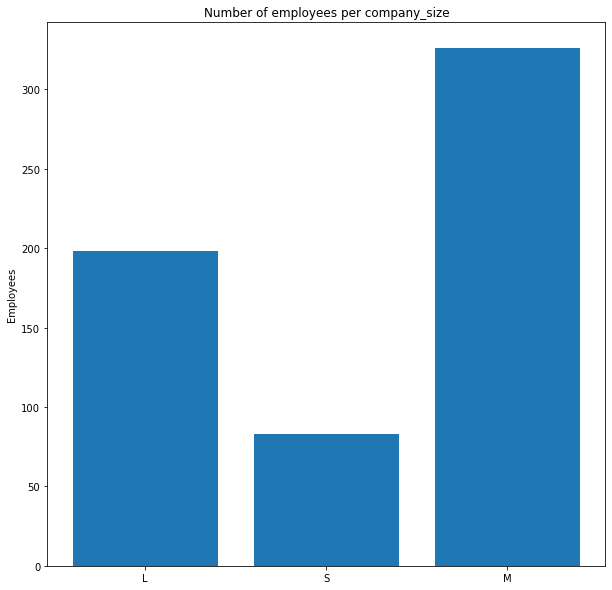

In [40]:
fig, axs = plt.subplots(figsize=(10,10))

company_size = list(df['company_size'].unique())

data = []
for i in range(len(company_size)):               
    data.append(df.loc[df['company_size']==company_size[i]].shape[0])

axs.bar(company_size,data)
axs.set_title('Number of employees per company_size')
axs.set_ylabel('Number of Employees')
plt.show()

Most of the companies are based in the US

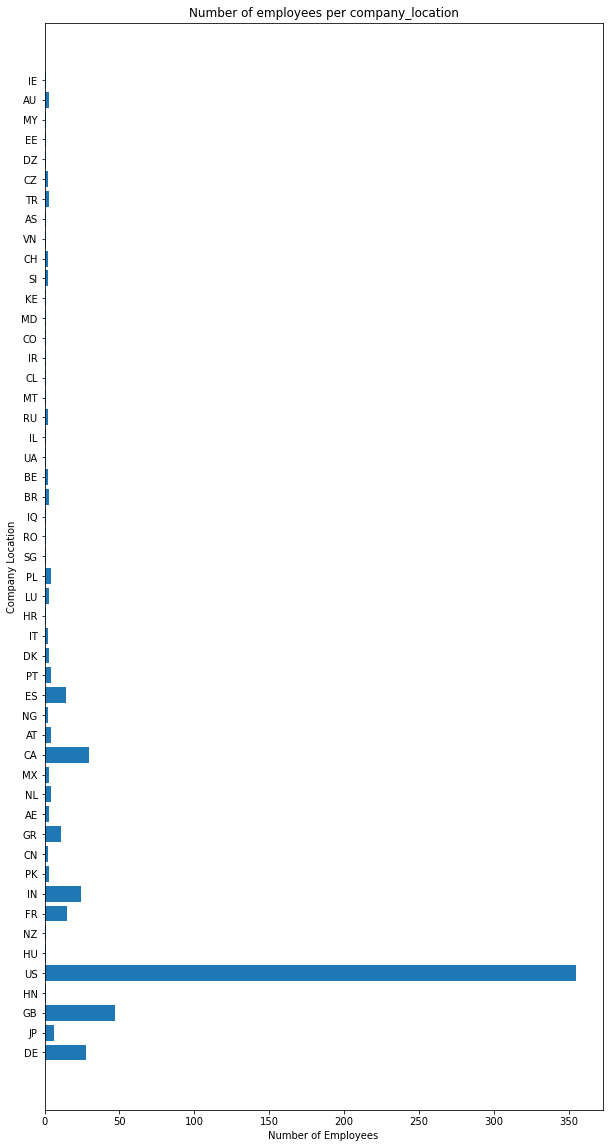

In [44]:
fig, axs = plt.subplots(figsize=(10,20))

company_location = list(df['company_location'].unique())

data = []
for i in range(len(company_location)):               
    data.append(df.loc[df['company_location']==company_location[i]].shape[0])

axs.barh(company_location,data)
axs.set_title('Number of employees per company_location')
axs.set_ylabel('Company Location')
axs.set_xlabel('Number of Employees')
plt.show()

Again most employees live in the US

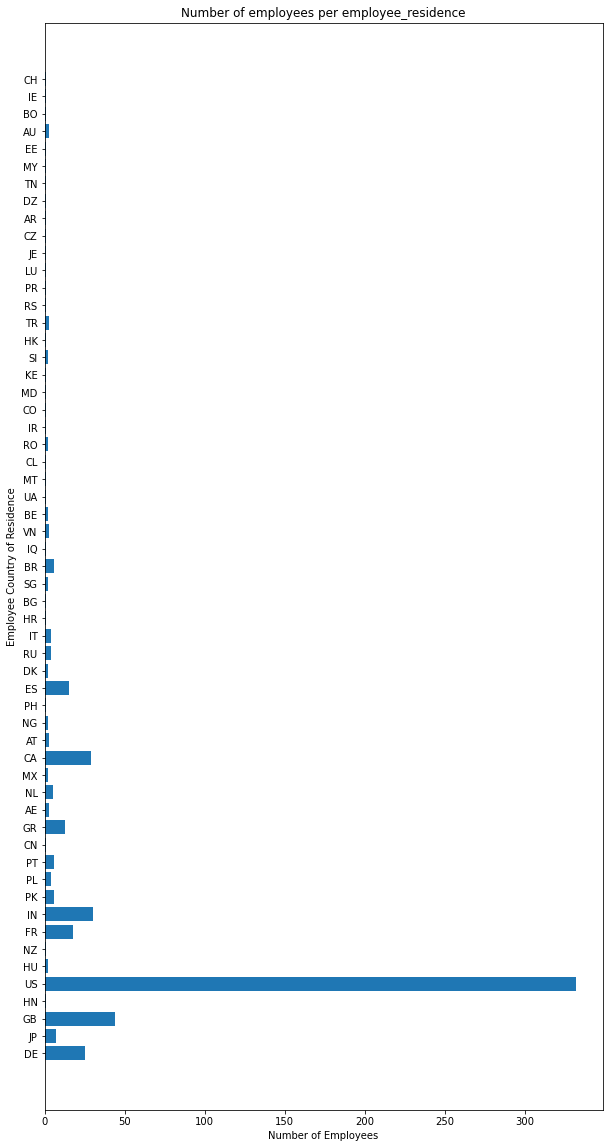

In [46]:
fig, axs = plt.subplots(figsize=(10,20))

employee_residence = list(df['employee_residence'].unique())

data = []
for i in range(len(employee_residence)):               
    data.append(df.loc[df['employee_residence']==employee_residence[i]].shape[0])

axs.barh(employee_residence,data)
axs.set_title('Number of employees per employee_residence')
axs.set_ylabel('Employee Country of Residence')
axs.set_xlabel('Number of Employees')
plt.show()

We see that data scientist followed by data engineer are the two most common job titles

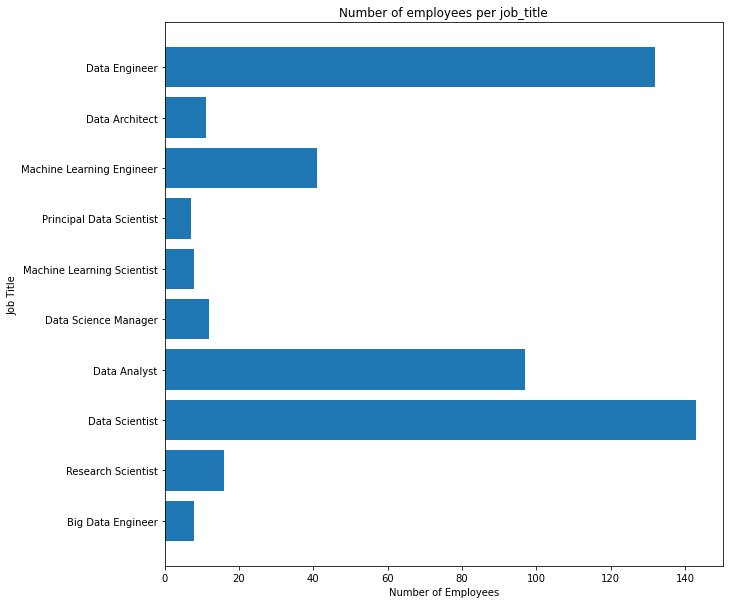

In [69]:
import random

fig, axs = plt.subplots(figsize=(10,10))

most_popular_job_titles = df['job_title'].value_counts()

job_title = list(most_popular_job_titles.index)[:10]

random.shuffle(job_title)

data = []
for i in range(len(job_title)):               
    data.append(df.loc[df['job_title']==job_title[i]].shape[0])

axs.barh(job_title,data)
axs.set_title('Number of employees per job_title')
axs.set_ylabel('Job Title')
axs.set_xlabel('Number of Employees')
plt.show()

### Data Science Salary predictor

We would like to build a model that is able to predict the salary that an employer will receive. However, since we are limited by the amount of available data, we are going to increase the amount of available data by synthetically generating more data. We are going to use two different packages for synthetic data generation, so to compare them as well as use the best one.

#### Feature Selection

In [70]:
df.drop(['salary', 'salary_currency'], inplace=True, axis=1) #We are removing these column since we have no use of them

An important part of feature selection is checking for highly correlated features. Therefore, we are going to examine the correlation between the features of our dataset so to avoid the collinearity problem

In [71]:
from scipy import stats
spearman_cors = {}

cols = list(df.columns)
cols.remove('salary_in_usd')
for i in range(len(cols)-1):
    for j in range(i+1, len(cols)): 
        spearman_cors[cols[i] + "__" + cols[j]] = stats.spearmanr(df[cols[i]], df[cols[j]])[0]

In [72]:
spearman_cors_df = pd.DataFrame(spearman_cors.items(), columns=['Pair', 'Spearman_Correlation'])

In [73]:
print('Min correlation pair')
spearman_cors_df.loc[spearman_cors_df['Spearman_Correlation']==spearman_cors_df['Spearman_Correlation'].min(), ['Pair', 'Spearman_Correlation']]

Min correlation pair


,Pair,Spearman_Correlation
4,work_year__remote_ratio,-0.254091


In [74]:
print('Max correlation pair')
spearman_cors_df.loc[spearman_cors_df['Spearman_Correlation']==spearman_cors_df['Spearman_Correlation'].max(), ['Pair', 'Spearman_Correlation']]

Max correlation pair


,Pair,Spearman_Correlation
23,employee_residence__company_location,0.9027


In [75]:
spearman_cors_df.sort_values(by=['Spearman_Correlation'], ascending=False)

,Pair,Spearman_Correlation
23,employee_residence__company_location,0.902700
0,work_year__experience_level,0.324165
11,experience_level__company_location,0.304931
9,experience_level__employee_residence,0.299620
3,work_year__employee_residence,0.233617
5,work_year__company_location,0.222740
6,work_year__company_size,0.152060
15,employment_type__remote_ratio,0.090814
19,job_title__remote_ratio,0.088682
17,employment_type__company_size,0.043220


Indeed we see that we have two highly correlated features, the employee residence and the company location. We will have to drop one of these prior to any model fitting

In [76]:
from scipy import stats
spearman_cors = {}

cols = list(df.columns)
cols.remove('salary_in_usd')
for i in range(len(cols)):
    spearman_cors[cols[i] + "__salary_in_usd"] = stats.spearmanr(df[cols[i]], df['salary_in_usd'])[0]

In [77]:
spearman_cors_df = pd.DataFrame(spearman_cors.items(), columns=['Pair', 'Spearman_Correlation'])

In [78]:
print('Min correlation pair')
spearman_cors_df.loc[spearman_cors_df['Spearman_Correlation']==spearman_cors_df['Spearman_Correlation'].min(), ['Pair', 'Spearman_Correlation']]

Min correlation pair


,Pair,Spearman_Correlation
7,company_size__salary_in_usd,-0.117667


In [79]:
print('Max correlation pair')
spearman_cors_df.loc[spearman_cors_df['Spearman_Correlation']==spearman_cors_df['Spearman_Correlation'].max(), ['Pair', 'Spearman_Correlation']]

Max correlation pair


,Pair,Spearman_Correlation
4,employee_residence__salary_in_usd,0.558921


In [80]:
spearman_cors_df.sort_values(by=['Spearman_Correlation'], ascending=False)

,Pair,Spearman_Correlation
4,employee_residence__salary_in_usd,0.558921
6,company_location__salary_in_usd,0.539988
1,experience_level__salary_in_usd,0.451255
0,work_year__salary_in_usd,0.274610
3,job_title__salary_in_usd,0.110341
2,employment_type__salary_in_usd,-0.101404
5,remote_ratio__salary_in_usd,-0.110265
7,company_size__salary_in_usd,-0.117667


We see that the key drivers for the salary in USD according to the Spearman Correlation are the employee residence followed by the company location

We will drop the company location since it is highly correlated with the employee residence

In [81]:
df.drop(['company_location'], inplace=True, axis=1) 

#### Outliers Removal

Since there exist some extreme outliers when it comes to salaries, we are going to drop them so that our synthetic model generator is able to better capture the inherent distribution of our data

In [82]:
high_outliers = list(df['salary_in_usd'].sort_values(ascending=False).index)[:10] #We drop the top 10 salaries

Compare the outliers we drop for having a high salary with the top 20 salaries in our data

In [83]:
df['salary_in_usd'].iloc[high_outliers]

252    600000
97     450000
33     450000
157    423000
225    416000
63     412000
523    405000
519    380000
25     325000
482    324000
Name: salary_in_usd, dtype: int64

In [84]:
df[['salary_in_usd']].sort_values(by=['salary_in_usd'], ascending=False)[:20]

,salary_in_usd
252,600000
97,450000
33,450000
157,423000
225,416000
63,412000
523,405000
519,380000
25,325000
482,324000


In [85]:
low_outliers = list(df['salary_in_usd'].sort_values(ascending=False).index)[-12:] #We also drop the lowest 12 salaries

Compare the outliers we drop for having a low salary with the lowest 20 salaries in our data

In [86]:
df['salary_in_usd'].iloc[low_outliers]

127    9466
196    9272
15     8000
21     6072
50     6072
213    5882
18     5707
179    5679
77     5409
238    4000
185    4000
176    2859
Name: salary_in_usd, dtype: int64

In [87]:
df[['salary_in_usd']].sort_values(by=['salary_in_usd'], ascending=False)[-20:]

,salary_in_usd
205,12901
247,12103
96,12000
113,12000
184,12000
124,10354
521,10000
38,10000
127,9466
196,9272


In [88]:
to_keep = [ind for ind in list(df.index) if ind not in high_outliers and ind not in low_outliers]

In [89]:
df = df.iloc[to_keep]

In [90]:
df.dtypes #Prior to fitting the CTGAN model we print the types

work_year             object
experience_level      object
employment_type       object
job_title             object
salary_in_usd          int64
employee_residence    object
remote_ratio          object
company_size          object
dtype: object

In [91]:
df.shape #Get the new size of the data after dropping the outliers

(585, 8)

#### Synthetical Data Generation

We are going to use two different packages for synthetic data generation so to compare them as well as use the best one of them

The first package we will use is the following

@misc{Diyago2020tabgan,
    author       = {Ashrapov, Insaf},
    title        = {GANs for tabular data},
    howpublished = {\url{https://github.com/Diyago/GAN-for-tabular-data}},
    year         = {2020}
}

The conditional GAN model expects to receive three dataframes - training_data, training_labels, testing_data

In [92]:
from random import sample

train_indices = sample(list(df.index), 485)

In [93]:
test_indices = [x for x in list(df.index) if x not in train_indices]

In [94]:
df_copy = df.copy()
cols = list(df_copy.columns)
cols.remove('salary_in_usd')
target = df_copy['salary_in_usd']
feats_df = df_copy[cols]

In [95]:
test_df = feats_df.loc[test_indices]
train_df = feats_df.loc[train_indices]
target = target.loc[train_indices]

In [96]:
test_df.shape

(100, 7)

In [97]:
train_df.shape

(485, 7)

In [98]:
target.shape

(485,)

In [99]:
train_df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'employee_residence', 'remote_ratio', 'company_size'],
      dtype='object')

In [100]:
from tabgan.sampler import OriginalGenerator, GANGenerator

In [ ]:
# #Gives a good data distribution <- indeed
# new_data, new_target = GANGenerator(gen_x_times=1.1, cat_cols=cols,
#            bot_filter_quantile=0.001, top_filter_quantile=0.999, is_post_process=True,
#            adversarial_model_params={
#                "metrics": "AUC", "max_depth": 2, "max_bin": 100, 
#                "learning_rate": 0.02, "random_state": 42, "n_estimators": 500,
#            }, pregeneration_frac=2, only_generated_data=False,
#            gan_params = {"batch_size": 500, "patience": 25, "epochs" : 500,}).generate_data_pipe(train_df, pd.DataFrame(target), test_df, deep_copy=True, only_adversarial=False, use_adversarial=True)

In [ ]:
# #Gives good results <- nope
# new_data, new_target = GANGenerator(gen_x_times=2, cat_cols=cols,
#            bot_filter_quantile=0.001, top_filter_quantile=0.999, is_post_process=True,
#            adversarial_model_params={
#                "metrics": "AUC", "max_depth": 2, "max_bin": 100, 
#                "learning_rate": 0.02, "random_state": 42, "n_estimators": 1000,
#            }, pregeneration_frac=2, only_generated_data=False,
#            gan_params = {"batch_size": 500, "patience": 25, "epochs" : 500,}).generate_data_pipe(train_df, pd.DataFrame(target), test_df, deep_copy=True, only_adversarial=False, use_adversarial=True)

In [ ]:
# #Gives good results <- nope
# new_data, new_target = GANGenerator(gen_x_times=2, cat_cols=cols,
#            bot_filter_quantile=0.001, top_filter_quantile=0.999, is_post_process=True,
#            adversarial_model_params={
#                "metrics": "AUC", "max_depth": 2, "max_bin": 100, 
#                "learning_rate": 0.01, "random_state": 42, "n_estimators": 1000,
#            }, pregeneration_frac=2, only_generated_data=False,
#            gan_params = {"batch_size": 500, "patience": 25, "epochs" : 500,}).generate_data_pipe(train_df, pd.DataFrame(target), test_df, deep_copy=True, only_adversarial=False, use_adversarial=True)

In [ ]:
# #Gives good results, happy with it
# new_data, new_target = GANGenerator(gen_x_times=2, cat_cols=cols,
#            bot_filter_quantile=0.001, top_filter_quantile=0.999, is_post_process=True,
#            adversarial_model_params={
#                "metrics": "AUC", "max_depth": 2, "max_bin": 100, 
#                "learning_rate": 0.05, "random_state": 42, "n_estimators": 1000,
#            }, pregeneration_frac=2, only_generated_data=False,
#            gan_params = {"batch_size": 500, "patience": 25, "epochs" : 500,}).generate_data_pipe(train_df, pd.DataFrame(target), test_df, deep_copy=True, only_adversarial=False, use_adversarial=True)

In [101]:
#happy with it
new_data, new_target = GANGenerator(gen_x_times=2, cat_cols=cols,
           bot_filter_quantile=0.001, top_filter_quantile=0.999, is_post_process=True,
           adversarial_model_params={
               "metrics": "AUC", "max_depth": 2, "max_bin": 100, 
               "learning_rate": 0.01, "random_state": 42, "n_estimators": 1000,
           }, pregeneration_frac=2, only_generated_data=False,
           gan_params = {"batch_size": 50, "patience": 25, "epochs" : 500,}).generate_data_pipe(train_df, pd.DataFrame(target), test_df, deep_copy=True, only_adversarial=False, use_adversarial=True)

Fitting CTGAN transformers for each column:   0%|          | 0/8 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]

C:\Users\George\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\George\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\George\anaconda3\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\George\anaconda3\lib\site-packages\lightgbm\basic.py:1513: UserWarning: categorical_co

In [102]:
new_data['salary_in_usd'] = new_target #Add the newly created target column to the synthetic dataset

In [103]:
new_data.drop_duplicates(inplace=True)

We need to evaluate the quality of our synthetic data by investigating how well the distribution of our initial data has been captured

Check the salary range

In [104]:
print('Maximum salary in synthetic data', new_data['salary_in_usd'].max())
print('Maximum salary in initial data', df['salary_in_usd'].max(), '\n')

print('Minimum salary in synthetic data', new_data['salary_in_usd'].min())
print('Minimum salary in initial data', df['salary_in_usd'].min())

Maximum salary in synthetic data 314554
Maximum salary in initial data 276000 

Minimum salary in synthetic data -49671
Minimum salary in initial data 10000


In [105]:
new_data = new_data.loc[(new_data['salary_in_usd'] >= 10000)] #We only keep records with a salary that is higher than 10K

In [106]:
new_data.shape #Print the size of the remaining data

(1112, 8)

Check the newly generated values per column vs the initial data

In [107]:
cols = list(new_data.columns)
cols.remove('salary_in_usd')
for col in cols:
    if set(list(df[col].unique())) != set(list(new_data[col].unique())):
        print(col, ' column differs')        

job_title  column differs
employee_residence  column differs


The employment type column does not contain the following values in the newly generated data

In [108]:
[x for x in list(df['employment_type'].unique()) if x not in list(new_data['employment_type'].unique())]

[]

The % frequency of the missing values in the initial data

In [109]:
round(df['employment_type'].value_counts(normalize=True)[df['employment_type'].value_counts(normalize=True).index.isin([x for x in list(df['employment_type'].unique()) if x not in list(new_data['employment_type'].unique())])] * 100,2)

Series([], Name: employment_type, dtype: float64)

The job title column does not contain the following values in the newly generated data

In [110]:
[x for x in list(df['job_title'].unique()) if x not in list(new_data['job_title'].unique())]

['Big Data Engineer',
 'Product Data Analyst',
 'Lead Data Engineer',
 'Lead Data Analyst',
 'Machine Learning Manager',
 'Data Engineering Manager',
 'Machine Learning Infrastructure Engineer',
 'Director of Data Science',
 'Marketing Data Analyst',
 'Data Science Engineer',
 'Machine Learning Developer',
 'Head of Data Science',
 'Data Specialist',
 'Finance Data Analyst',
 'Principal Data Analyst',
 'Big Data Architect',
 'Staff Data Scientist',
 'Analytics Engineer',
 'ETL Developer',
 'Head of Machine Learning',
 'NLP Engineer',
 'Lead Machine Learning Engineer',
 'Financial Data Analyst']

The % frequency of the missing values in the initial data

In [111]:
round(df['job_title'].value_counts(normalize=True)[df['job_title'].value_counts(normalize=True).index.isin([x for x in list(df['job_title'].unique()) if x not in list(new_data['job_title'].unique())])] * 100,2)

Big Data Engineer                           1.20
Lead Data Engineer                          1.03
Director of Data Science                    1.03
Data Engineering Manager                    0.85
Head of Data Science                        0.68
Analytics Engineer                          0.68
Data Science Engineer                       0.51
Machine Learning Infrastructure Engineer    0.51
Lead Data Analyst                           0.51
Machine Learning Developer                  0.51
Principal Data Analyst                      0.34
ETL Developer                               0.34
Product Data Analyst                        0.17
NLP Engineer                                0.17
Lead Machine Learning Engineer              0.17
Head of Machine Learning                    0.17
Data Specialist                             0.17
Staff Data Scientist                        0.17
Big Data Architect                          0.17
Finance Data Analyst                        0.17
Machine Learning Man

The employee residence column does not contain the following values in the newly generated data

In [112]:
[x for x in list(df['employee_residence'].unique()) if x not in list(new_data['employee_residence'].unique())]

['HN',
 'HU',
 'NZ',
 'CN',
 'AE',
 'MX',
 'PH',
 'DK',
 'PK',
 'RU',
 'HR',
 'BG',
 'SG',
 'IQ',
 'UA',
 'MT',
 'CL',
 'RO',
 'CO',
 'MD',
 'HK',
 'TR',
 'RS',
 'PR',
 'LU',
 'JE',
 'CZ',
 'AR',
 'DZ',
 'TN',
 'MY',
 'EE',
 'BO',
 'IE',
 'CH']

The % frequency of the missing values in the initial data

In [113]:
round(df['employee_residence'].value_counts(normalize=True)[df['employee_residence'].value_counts(normalize=True).index.isin([x for x in list(df['employee_residence'].unique()) if x not in list(new_data['employee_residence'].unique())])] * 100,2)

PK    0.85
RU    0.68
AE    0.51
TR    0.51
RO    0.34
SG    0.34
HU    0.34
DK    0.34
RS    0.17
IE    0.17
BO    0.17
HN    0.17
EE    0.17
MY    0.17
TN    0.17
DZ    0.17
AR    0.17
CZ    0.17
JE    0.17
LU    0.17
PR    0.17
HR    0.17
BG    0.17
HK    0.17
NZ    0.17
MD    0.17
CO    0.17
CN    0.17
CL    0.17
MT    0.17
UA    0.17
MX    0.17
IQ    0.17
PH    0.17
CH    0.17
Name: employee_residence, dtype: float64

We can see that our Conditional GAN model has done a good job in capturing the distribution of each feature

In [114]:
for col in cols:
    print('Initial data distribution \n', df[col].value_counts(normalize=True) * 100, '\n')
    print('Synthetic data distribution \n', new_data[col].value_counts(normalize=True) * 100, '\n')    

Initial data distribution 
 2022    53.846154
2021    35.042735
2020    11.111111
Name: work_year, dtype: float64 

Synthetic data distribution 
 2022    50.539568
2021    39.748201
2020     9.712230
Name: work_year, dtype: float64 

Initial data distribution 
 SE    47.350427
MI    34.700855
EN    14.188034
EX     3.760684
Name: experience_level, dtype: float64 

Synthetic data distribution 
 MI    43.974820
SE    35.521583
EN    16.007194
EX     4.496403
Name: experience_level, dtype: float64 

Initial data distribution 
 FT    97.094017
PT     1.538462
CT     0.683761
FL     0.683761
Name: employment_type, dtype: float64 

Synthetic data distribution 
 FT    96.402878
FL     1.708633
PT     1.079137
CT     0.809353
Name: employment_type, dtype: float64 

Initial data distribution 
 Data Scientist                              23.589744
Data Engineer                               22.222222
Data Analyst                                16.239316
Machine Learning Engineer                 

Using the below scatter plots we investigate the per feature distribution with the salary column, comparing it with the initial data distribution. Overall, our model does a good job of capturing the inherent distribution of our data

Salaries have increased in 2022 compared to the previous 2 years in our synthetic data

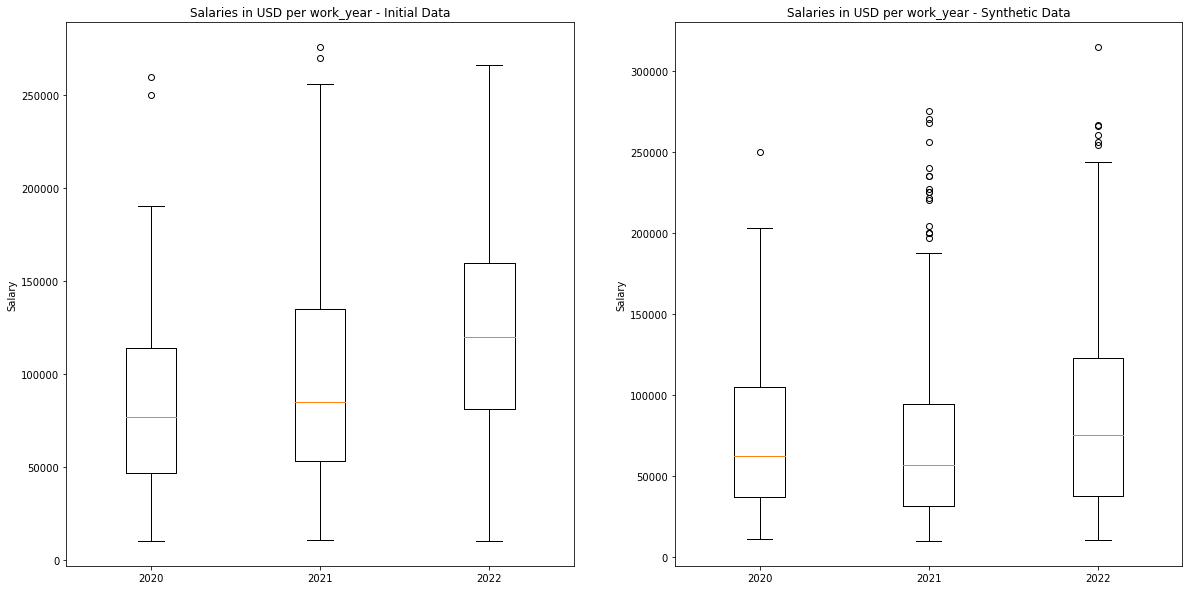

In [115]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))

work_year = list(df['work_year'].unique())

data = []
for i in range(len(work_year)):
    data.append(df.loc[df['work_year']==work_year[i], 'salary_in_usd'])

axs[0].boxplot(data)
axs[0].set_title('Salaries in USD per work_year - Initial Data')
axs[0].set_ylabel('Salary')

data = []
for i in range(len(work_year)):    
    data.append(new_data.loc[new_data['work_year']==work_year[i], 'salary_in_usd'])

axs[1].boxplot(data)
axs[1].set_title('Salaries in USD per work_year - Synthetic Data')
axs[1].set_ylabel('Salary')

axs[0].set_xticklabels(work_year)
axs[1].set_xticklabels(work_year)

plt.show()

Although not as protracted as in our initial data, the median salary per experience level ranking is as expected. Also we can see that the 25% to 75% salary range per experience level follows our initial data distribution

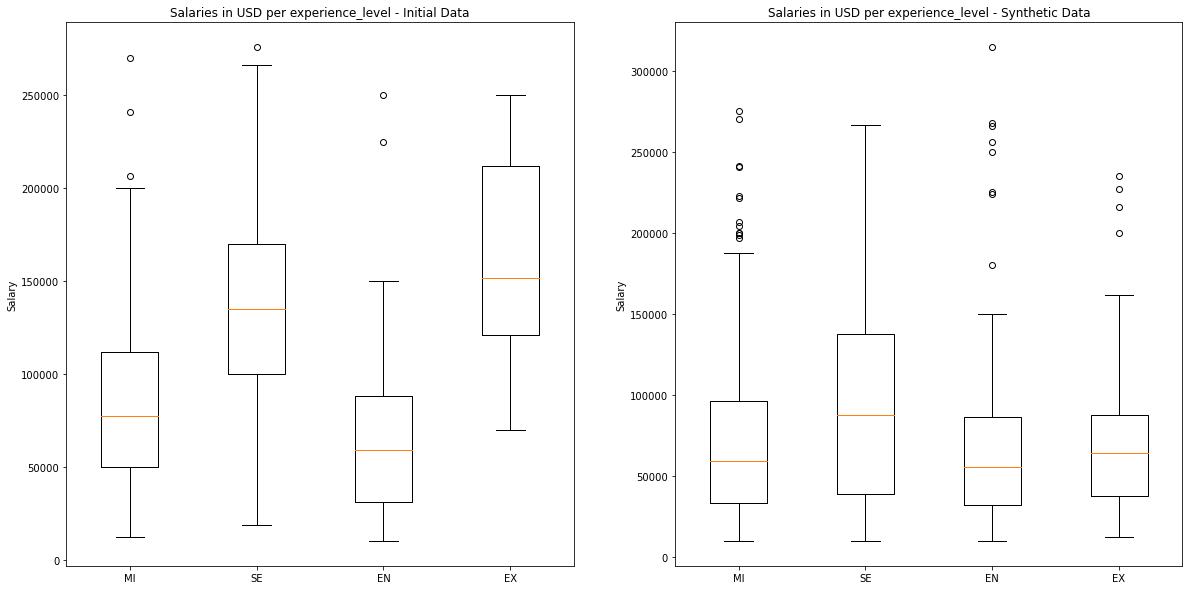

In [116]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))

experience_level = list(df['experience_level'].unique())

data = []
for i in range(len(experience_level)):
    data.append(df.loc[df['experience_level']==experience_level[i], 'salary_in_usd'])

axs[0].boxplot(data)
axs[0].set_title('Salaries in USD per experience_level - Initial Data')
axs[0].set_ylabel('Salary')

data = []
for i in range(len(experience_level)):
    data.append(new_data.loc[new_data['experience_level']==experience_level[i], 'salary_in_usd'])

axs[1].boxplot(data)
axs[1].set_title('Salaries in USD per experience_level - Synthetic Data')
axs[1].set_ylabel('Salary')

axs[0].set_xticklabels(experience_level)
axs[1].set_xticklabels(experience_level)

plt.show()

It has been adequately captured that the median salary for FT is at 100K as well as that the 75% salary for FT again is around 150K. However, when it comes to Part Time employment the model could do a better job.

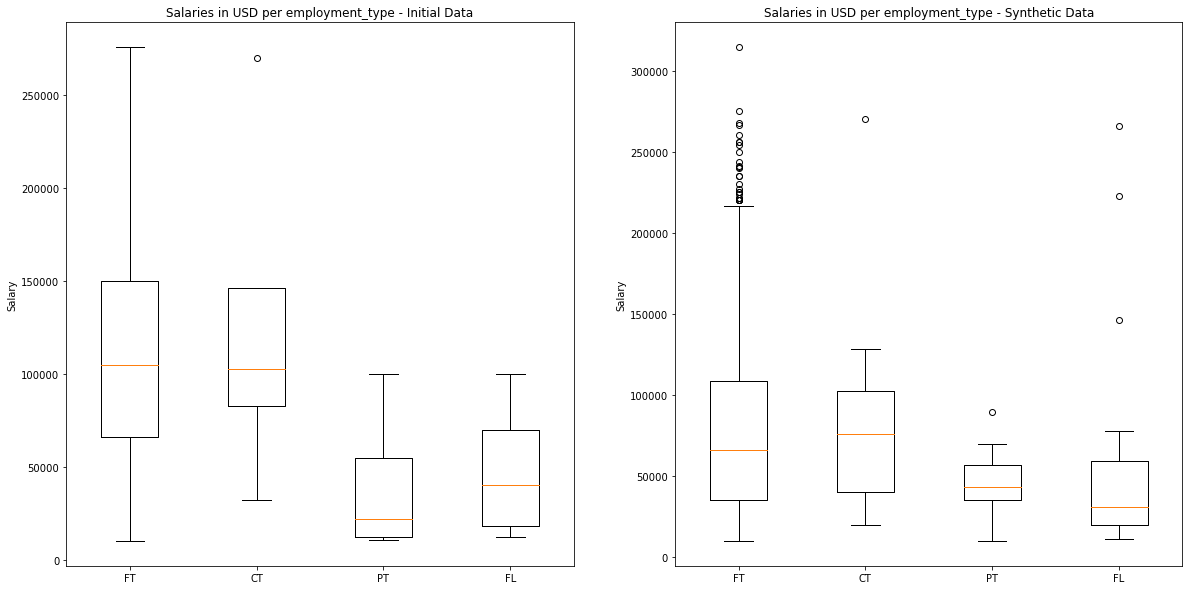

In [117]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))

employment_type = list(df['employment_type'].unique())

data = []
for i in range(len(employment_type)):
    data.append(df.loc[df['employment_type']==employment_type[i], 'salary_in_usd'])

axs[0].boxplot(data)
axs[0].set_title('Salaries in USD per employment_type - Initial Data')
axs[0].set_ylabel('Salary')

data = []
for i in range(len(employment_type)):
    data.append(new_data.loc[new_data['employment_type']==employment_type[i], 'salary_in_usd'])

axs[1].boxplot(data)
axs[1].set_title('Salaries in USD per employment_type - Synthetic Data')
axs[1].set_ylabel('Salary')

axs[0].set_xticklabels(employment_type)
axs[1].set_xticklabels(employment_type)

plt.show()

We can see that the distribution between the five most common job titles and salary is adequately captured in our synthetic data, with data scientists and data engineers being paid slightly more than their colleagues.

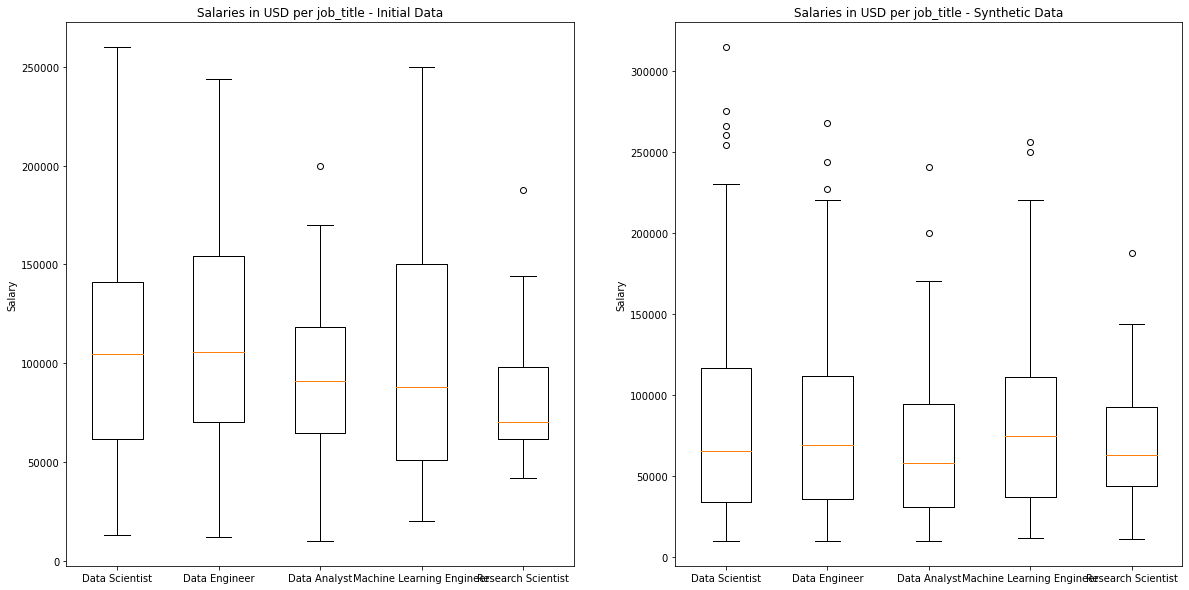

In [118]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))

job_title = list(df['job_title'].value_counts(normalize=True)[:5].index)

data = []
for i in range(len(job_title)):
    data.append(df.loc[df['job_title']==job_title[i], 'salary_in_usd'])

axs[0].boxplot(data)
axs[0].set_title('Salaries in USD per job_title - Initial Data')
axs[0].set_ylabel('Salary')

data = []
for i in range(len(job_title)):
    data.append(new_data.loc[new_data['job_title']==job_title[i], 'salary_in_usd'])

axs[1].boxplot(data)
axs[1].set_title('Salaries in USD per job_title - Synthetic Data')
axs[1].set_ylabel('Salary')

axs[0].set_xticklabels(job_title)
axs[1].set_xticklabels(job_title)

plt.show()

We observe that in our synthetic data those working 50% at home, have a lower median salary as well as a lower 75% threshold, while the rest have a median at 100K as expected from our initial data

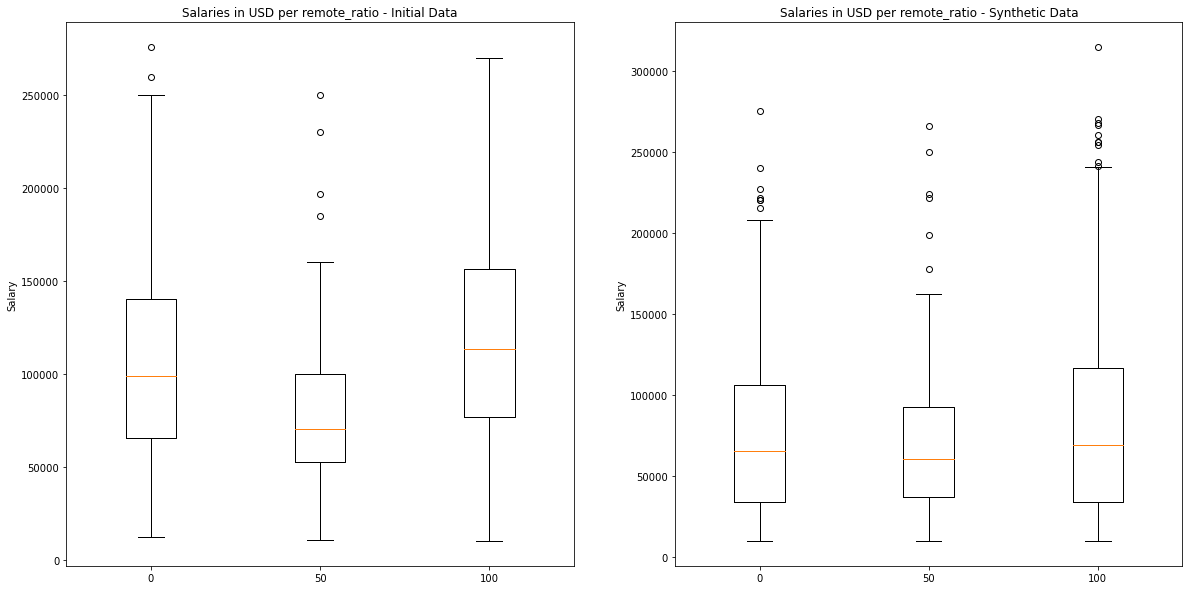

In [119]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))

remote_ratio = list(df['remote_ratio'].unique())

data = []
for i in range(len(remote_ratio)):
    data.append(df.loc[df['remote_ratio']==remote_ratio[i], 'salary_in_usd'])

axs[0].boxplot(data)
axs[0].set_title('Salaries in USD per remote_ratio - Initial Data')
axs[0].set_ylabel('Salary')

data = []
for i in range(len(remote_ratio)):
    data.append(new_data.loc[new_data['remote_ratio']==remote_ratio[i], 'salary_in_usd'])

axs[1].boxplot(data)
axs[1].set_title('Salaries in USD per remote_ratio - Synthetic Data')
axs[1].set_ylabel('Salary')

axs[0].set_xticklabels(remote_ratio)
axs[1].set_xticklabels(remote_ratio)

plt.show()

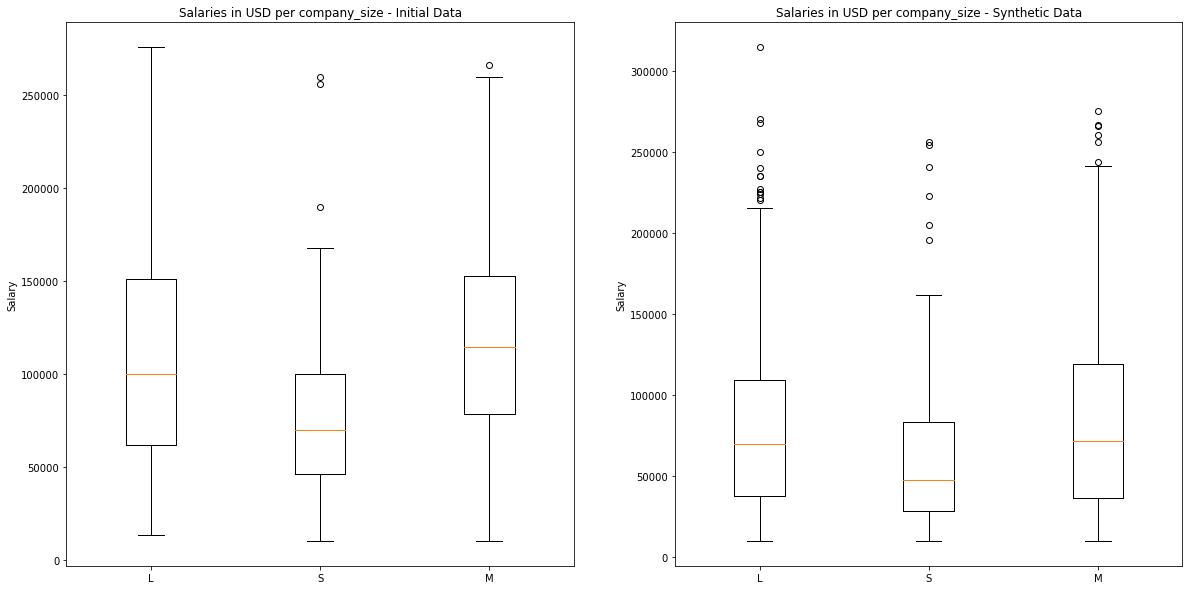

In [120]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))

company_size = list(df['company_size'].unique())

data = []
for i in range(len(company_size)):
    data.append(df.loc[df['company_size']==company_size[i], 'salary_in_usd'])

axs[0].boxplot(data)
axs[0].set_title('Salaries in USD per company_size - Initial Data')
axs[0].set_ylabel('Salary')

data = []
for i in range(len(company_size)):
    data.append(new_data.loc[new_data['company_size']==company_size[i], 'salary_in_usd'])

axs[1].boxplot(data)
axs[1].set_title('Salaries in USD per company_size - Synthetic Data')
axs[1].set_ylabel('Salary')

axs[0].set_xticklabels(company_size)
axs[1].set_xticklabels(company_size)

plt.show()

In [121]:
new_data_1 = new_data.copy()

#### Second CTGAN model

The second package we use is the CTGAN model as it was proposed by Lei Xu, Maria Skoularidou, Alfredo Cuesta-Infante, Kalyan Veeramachaneni in their paper titled "Modeling Tabular data using Conditional GAN" that was accepted at NeurIPS, 2019.

In [122]:
from sdv.tabular import CTGAN

In [123]:
model = CTGAN() #define the CTGAN model we will use for generating new data

In [124]:
model.fit(df) #fit the model with our data

C:\Users\George\anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '
C:\Users\George\AppData\Roaming\Python\Python39\site-packages\ctgan\data_transformer.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data[column_name].to_numpy().flatten()


We sample 1600 rows so to generate the same amount of data we have from the first package

In [125]:
new_data = model.sample(num_rows=1600)

In [126]:
new_data.drop_duplicates(inplace=True)

In [127]:
print('Maximum salary in synthetic data', new_data['salary_in_usd'].max())
print('Maximum salary in initial data', df['salary_in_usd'].max(), '\n')

print('Minimum salary in synthetic data', new_data['salary_in_usd'].min())
print('Minimum salary in initial data', df['salary_in_usd'].min())

Maximum salary in synthetic data 276000
Maximum salary in initial data 276000 

Minimum salary in synthetic data 10000
Minimum salary in initial data 10000


In [128]:
new_data = new_data.loc[(new_data['salary_in_usd'] >= 10000)] #We only keep records with a salary that is higher than 10K

In [129]:
new_data.shape

(1600, 8)

Check the newly generated data vs initial data per column

In [130]:
cols = list(new_data.columns)
cols.remove('salary_in_usd')
for col in cols:
    if set(list(df[col].unique())) != set(list(new_data[col].unique())):
        print(col, ' column differs')        

The frequency of the missing data in the initial data

In [131]:
round(df['job_title'].value_counts(normalize=True)[df['job_title'].value_counts(normalize=True).index.isin([x for x in list(df['job_title'].unique()) if x not in list(new_data['job_title'].unique())])] * 100,2)

Series([], Name: job_title, dtype: float64)

In [132]:
for col in cols:
    print('Initial data distribution \n', df[col].value_counts(normalize=True) * 100, '\n')
    print('Synthetic data distribution \n', new_data[col].value_counts(normalize=True) * 100, '\n')    

Initial data distribution 
 2022    53.846154
2021    35.042735
2020    11.111111
Name: work_year, dtype: float64 

Synthetic data distribution 
 2022    47.9375
2021    37.5000
2020    14.5625
Name: work_year, dtype: float64 

Initial data distribution 
 SE    47.350427
MI    34.700855
EN    14.188034
EX     3.760684
Name: experience_level, dtype: float64 

Synthetic data distribution 
 MI    38.500
SE    37.625
EN    20.000
EX     3.875
Name: experience_level, dtype: float64 

Initial data distribution 
 FT    97.094017
PT     1.538462
CT     0.683761
FL     0.683761
Name: employment_type, dtype: float64 

Synthetic data distribution 
 FT    89.1250
PT     5.0625
CT     3.1250
FL     2.6875
Name: employment_type, dtype: float64 

Initial data distribution 
 Data Scientist                              23.589744
Data Engineer                               22.222222
Data Analyst                                16.239316
Machine Learning Engineer                    7.008547
Research Scien

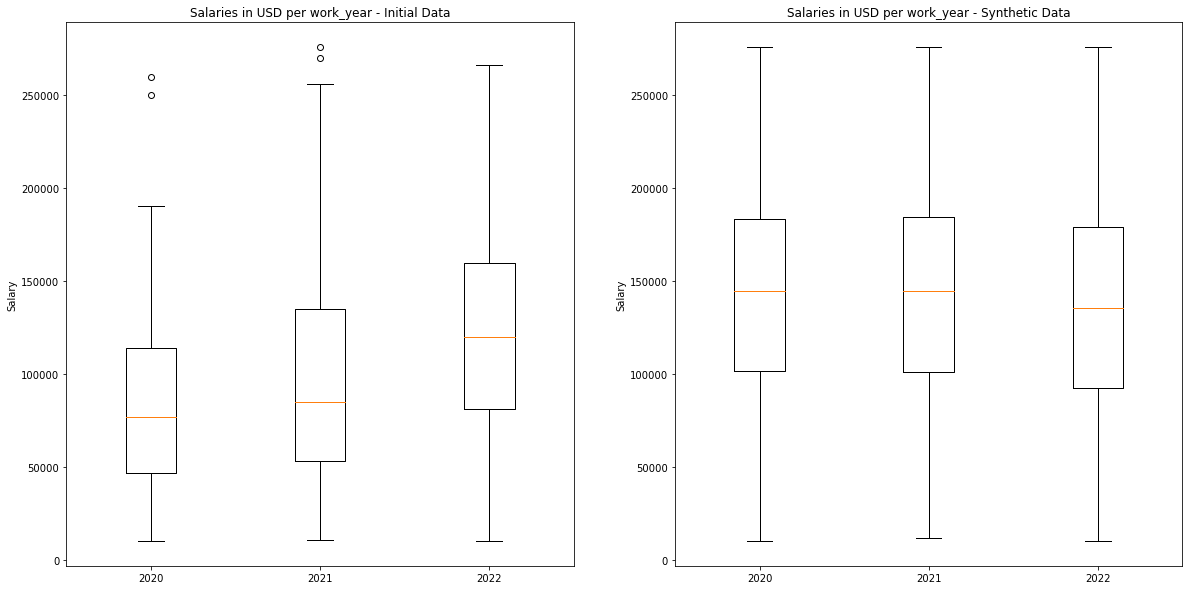

In [133]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))

work_year = list(df['work_year'].unique())

data = []
for i in range(len(work_year)):
    data.append(df.loc[df['work_year']==work_year[i], 'salary_in_usd'])

axs[0].boxplot(data)
axs[0].set_title('Salaries in USD per work_year - Initial Data')
axs[0].set_ylabel('Salary')

data = []
for i in range(len(work_year)):    
    data.append(new_data.loc[new_data['work_year']==work_year[i], 'salary_in_usd'])

axs[1].boxplot(data)
axs[1].set_title('Salaries in USD per work_year - Synthetic Data')
axs[1].set_ylabel('Salary')

axs[0].set_xticklabels(work_year)
axs[1].set_xticklabels(work_year)

plt.show()

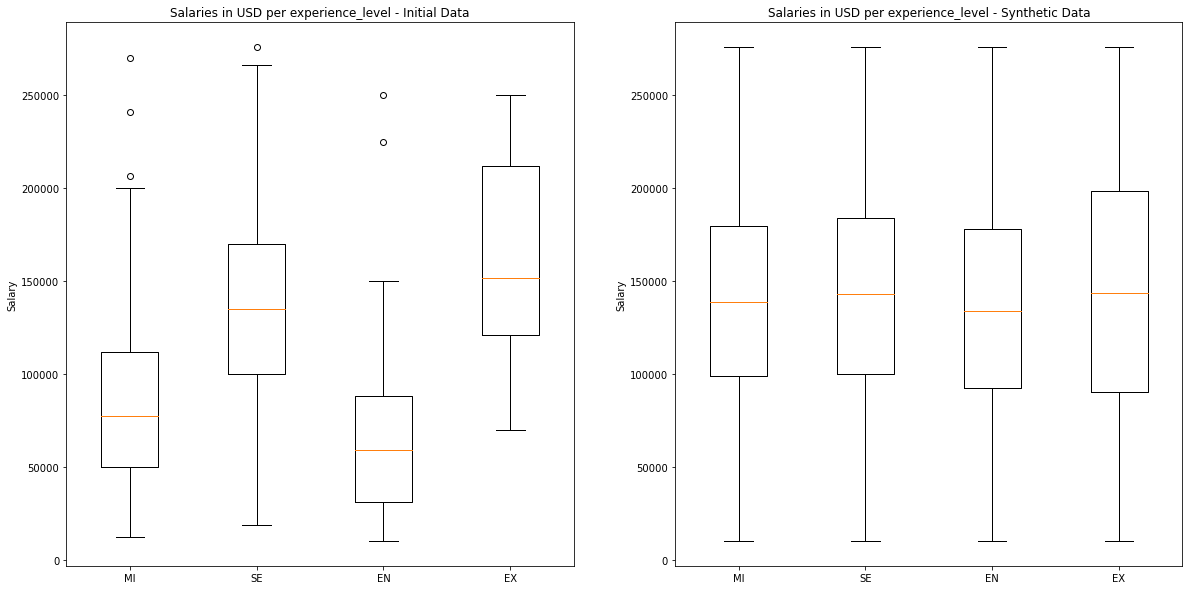

In [134]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))

experience_level = list(df['experience_level'].unique())

data = []
for i in range(len(experience_level)):
    data.append(df.loc[df['experience_level']==experience_level[i], 'salary_in_usd'])

axs[0].boxplot(data)
axs[0].set_title('Salaries in USD per experience_level - Initial Data')
axs[0].set_ylabel('Salary')

data = []
for i in range(len(experience_level)):
    data.append(new_data.loc[new_data['experience_level']==experience_level[i], 'salary_in_usd'])

axs[1].boxplot(data)
axs[1].set_title('Salaries in USD per experience_level - Synthetic Data')
axs[1].set_ylabel('Salary')

axs[0].set_xticklabels(experience_level)
axs[1].set_xticklabels(experience_level)

plt.show()

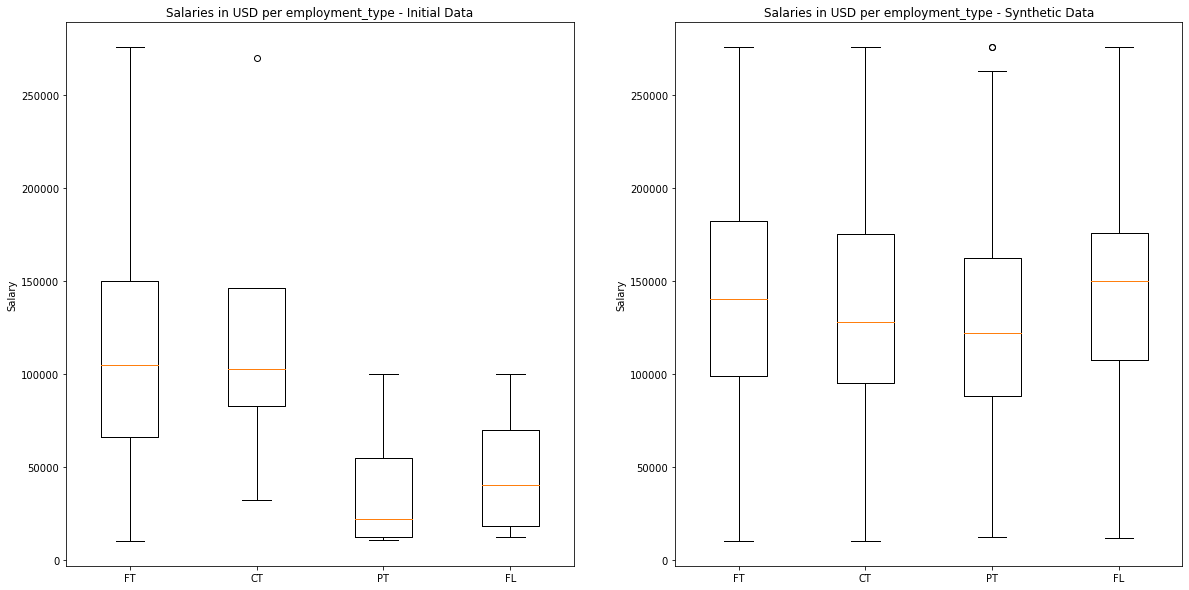

In [135]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))

employment_type = list(df['employment_type'].unique())

data = []
for i in range(len(employment_type)):
    data.append(df.loc[df['employment_type']==employment_type[i], 'salary_in_usd'])

axs[0].boxplot(data)
axs[0].set_title('Salaries in USD per employment_type - Initial Data')
axs[0].set_ylabel('Salary')

data = []
for i in range(len(employment_type)):
    data.append(new_data.loc[new_data['employment_type']==employment_type[i], 'salary_in_usd'])

axs[1].boxplot(data)
axs[1].set_title('Salaries in USD per employment_type - Synthetic Data')
axs[1].set_ylabel('Salary')

axs[0].set_xticklabels(employment_type)
axs[1].set_xticklabels(employment_type)

plt.show()

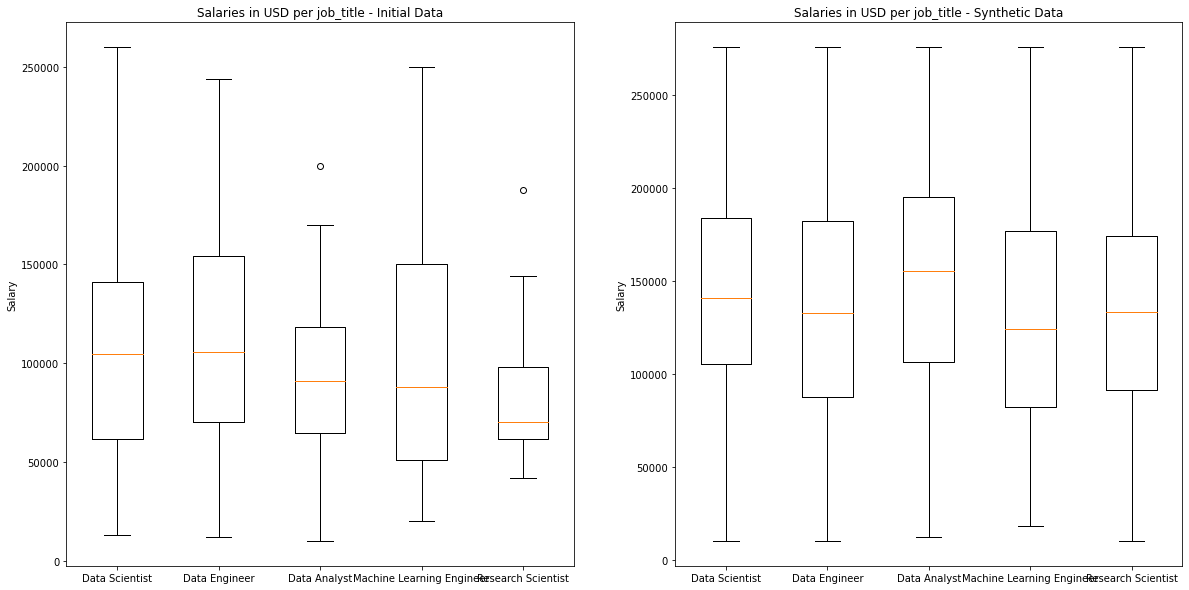

In [136]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))

job_title = list(df['job_title'].value_counts(normalize=True)[:5].index)

data = []
for i in range(len(job_title)):
    data.append(df.loc[df['job_title']==job_title[i], 'salary_in_usd'])

axs[0].boxplot(data)
axs[0].set_title('Salaries in USD per job_title - Initial Data')
axs[0].set_ylabel('Salary')

data = []
for i in range(len(job_title)):
    data.append(new_data.loc[new_data['job_title']==job_title[i], 'salary_in_usd'])

axs[1].boxplot(data)
axs[1].set_title('Salaries in USD per job_title - Synthetic Data')
axs[1].set_ylabel('Salary')

axs[0].set_xticklabels(job_title)
axs[1].set_xticklabels(job_title)

plt.show()

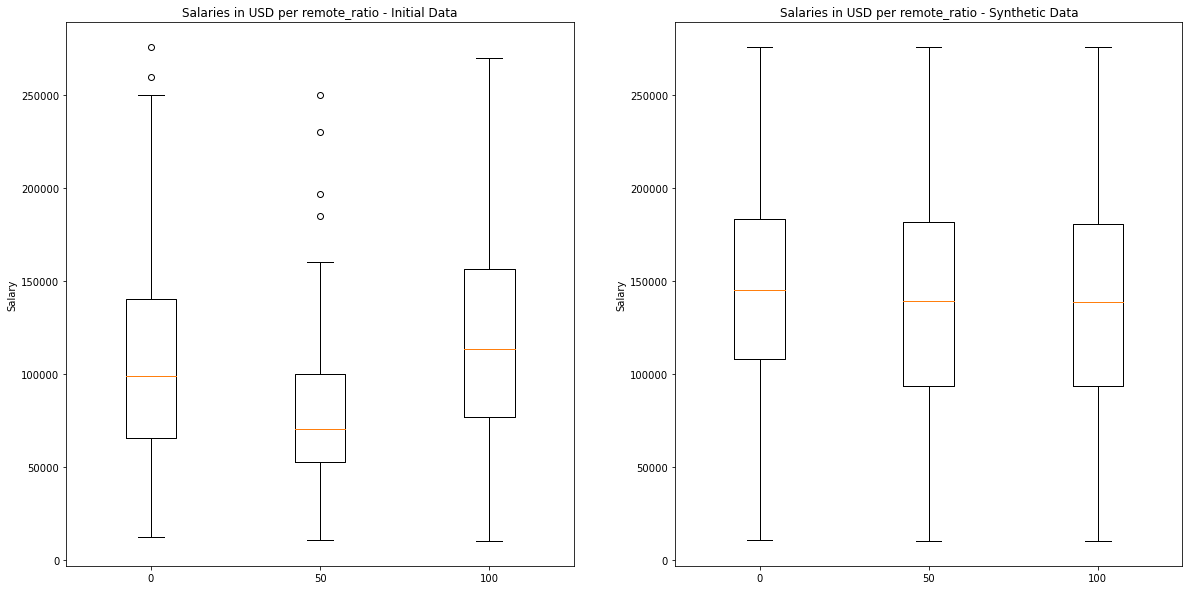

In [137]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))

remote_ratio = list(df['remote_ratio'].unique())

data = []
for i in range(len(remote_ratio)):
    data.append(df.loc[df['remote_ratio']==remote_ratio[i], 'salary_in_usd'])

axs[0].boxplot(data)
axs[0].set_title('Salaries in USD per remote_ratio - Initial Data')
axs[0].set_ylabel('Salary')

data = []
for i in range(len(remote_ratio)):
    data.append(new_data.loc[new_data['remote_ratio']==remote_ratio[i], 'salary_in_usd'])

axs[1].boxplot(data)
axs[1].set_title('Salaries in USD per remote_ratio - Synthetic Data')
axs[1].set_ylabel('Salary')

axs[0].set_xticklabels(remote_ratio)
axs[1].set_xticklabels(remote_ratio)

plt.show()

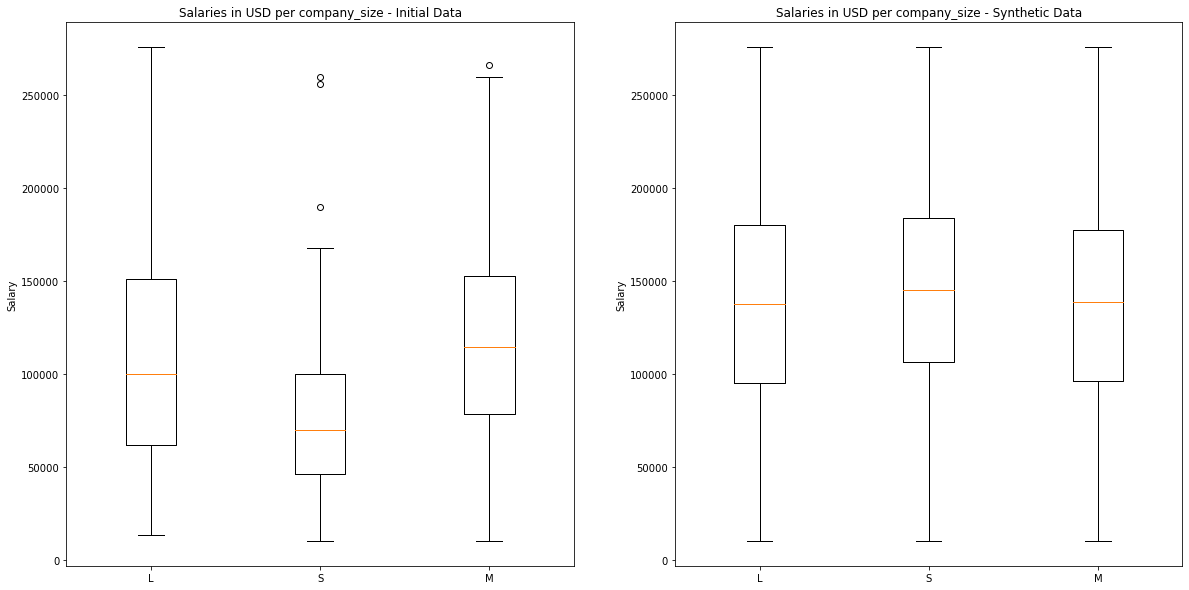

In [138]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))

company_size = list(df['company_size'].unique())

data = []
for i in range(len(company_size)):
    data.append(df.loc[df['company_size']==company_size[i], 'salary_in_usd'])

axs[0].boxplot(data)
axs[0].set_title('Salaries in USD per company_size - Initial Data')
axs[0].set_ylabel('Salary')

data = []
for i in range(len(company_size)):
    data.append(new_data.loc[new_data['company_size']==company_size[i], 'salary_in_usd'])

axs[1].boxplot(data)
axs[1].set_title('Salaries in USD per company_size - Synthetic Data')
axs[1].set_ylabel('Salary')

axs[0].set_xticklabels(company_size)
axs[1].set_xticklabels(company_size)

plt.show()

We observe that the quality of the data that were generated using the 1st package tabgan is superior, since it was able to capture the inherent distribution of the various columns vs the salary in USD

#### DS Salary Generation

We are going to use only the newly created data for training and we are going to use the real data to assess our model's performance

In [139]:
training_data = new_data_1.copy()

In [140]:
X = training_data.copy()
y = X['salary_in_usd']
X.drop(['salary_in_usd'], axis=1, inplace=True)

In [141]:
X.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
employee_residence    0
remote_ratio          0
company_size          0
dtype: int64

In [142]:
X.shape

(1112, 7)

In [143]:
X_test = df.copy()
y_test = X_test['salary_in_usd']
X_test.drop(['salary_in_usd'], axis=1, inplace=True)

In [144]:
X_test.shape

(585, 7)

All of our features are categorical hence pre-processing is needed before we can pass them over to a regression model. For ordinal features we are going to use label encoding, for nominal features with low cardinality we use one-hot encoding and finally for high cardinallity nominal features we use binary encoding

In [145]:
import category_encoders as ce

experience_level_encoder = ce.OrdinalEncoder(cols=['experience_level'],return_df=True, mapping=[{'col':'experience_level', 'mapping':{'SE':0,'MI':1,'EN':2,'EX':3}}])
X['experience_level_encoded'] = experience_level_encoder.fit_transform(X['experience_level'])
X_test['experience_level_encoded'] = experience_level_encoder.transform(X_test['experience_level'])

In [146]:
X['experience_level_encoded'].value_counts()

1    489
0    395
2    178
3     50
Name: experience_level_encoded, dtype: int64

In [147]:
X['experience_level'].value_counts()

MI    489
SE    395
EN    178
EX     50
Name: experience_level, dtype: int64

In [148]:
X_test['experience_level_encoded'].value_counts()

0    277
1    203
2     83
3     22
Name: experience_level_encoded, dtype: int64

In [149]:
remote_ratio_encoder = ce.OrdinalEncoder(cols=['remote_ratio'],return_df=True, mapping=[{'col':'remote_ratio', 'mapping':{'0':0,'50':1,'100':2}}])
X['remote_ratio_encoded'] = remote_ratio_encoder.fit_transform(X['remote_ratio'])
X_test['remote_ratio_encoded'] = remote_ratio_encoder.transform(X_test['remote_ratio'])

In [150]:
X['remote_ratio_encoded'].value_counts()

2    643
0    257
1    212
Name: remote_ratio_encoded, dtype: int64

In [151]:
X['remote_ratio'].value_counts()

100    643
0      257
50     212
Name: remote_ratio, dtype: int64

In [152]:
X_test['remote_ratio_encoded'].value_counts()

2    369
0    121
1     95
Name: remote_ratio_encoded, dtype: int64

In [153]:
company_size_encoder = ce.OrdinalEncoder(cols=['company_size'],return_df=True, mapping=[{'col':'company_size', 'mapping':{'S':0,'M':1,'L':2}}])
X['company_size_encoded'] = company_size_encoder.fit_transform(X['company_size'])
X_test['company_size_encoded'] = company_size_encoder.transform(X_test['company_size'])

In [154]:
X['company_size_encoded'].value_counts()

1    554
2    337
0    221
Name: company_size_encoded, dtype: int64

In [155]:
X['company_size'].value_counts()

M    554
L    337
S    221
Name: company_size, dtype: int64

In [156]:
X_test['company_size_encoded'].value_counts()

1    320
2    188
0     77
Name: company_size_encoded, dtype: int64

In [157]:
work_year_encoder = ce.OneHotEncoder(cols='work_year', handle_unknown='return_nan', return_df=True, use_cat_names=True)
work_year_encoded = work_year_encoder.fit_transform(X['work_year'])
work_year_encoded_test = work_year_encoder.transform(X_test['work_year'])

In [158]:
work_year_encoded.shape

(1112, 3)

In [159]:
employment_type_encoder = ce.OneHotEncoder(cols='employment_type', handle_unknown='value', return_df=True, use_cat_names=True)
employment_type_encoded = employment_type_encoder.fit_transform(X['employment_type'])
employment_type_encoded_test = employment_type_encoder.transform(X_test['employment_type'])

In [160]:
employment_type_encoded.shape

(1112, 4)

In [161]:
job_title_encoder= ce.BinaryEncoder(cols=['job_title'],return_df=True)
job_title_encoded = job_title_encoder.fit_transform(X['job_title']) 
job_title_encoded_test = job_title_encoder.transform(X_test['job_title']) 

In [162]:
job_title_encoded.shape

(1112, 5)

In [163]:
employee_residence_encoder= ce.BinaryEncoder(cols=['employee_residence'],return_df=True)
employee_residence_encoded = employee_residence_encoder.fit_transform(X['employee_residence']) 
employee_residence_encoded_test = employee_residence_encoder.transform(X_test['employee_residence']) 

In [164]:
employee_residence_encoded.shape

(1112, 5)

In [165]:
print(work_year_encoded.shape)
print(X['experience_level_encoded'].shape)
print(employment_type_encoded.shape)
print(job_title_encoded.shape)
print(employee_residence_encoded.shape)
print(X['remote_ratio'].shape)
print(X['company_size_encoded'].shape)

(1112, 3)
(1112,)
(1112, 4)
(1112, 5)
(1112, 5)
(1112,)
(1112,)


In [166]:
print(work_year_encoded_test.shape)
print(X_test['experience_level_encoded'].shape)
print(employment_type_encoded_test.shape)
print(job_title_encoded_test.shape)
print(employee_residence_encoded_test.shape)
print(X_test['remote_ratio'].shape)
print(X_test['company_size_encoded'].shape)

(585, 3)
(585,)
(585, 4)
(585, 5)
(585, 5)
(585,)
(585,)


In [167]:
new_transformed_df = pd.concat([work_year_encoded, X['experience_level_encoded'], employment_type_encoded, job_title_encoded, X['remote_ratio_encoded'], employee_residence_encoded, X['company_size_encoded']], axis=1)

In [168]:
new_transformed_df_test = pd.concat([work_year_encoded_test, X_test['experience_level_encoded'], employment_type_encoded_test, job_title_encoded_test, X_test['remote_ratio_encoded'], employee_residence_encoded_test, X_test['company_size_encoded']], axis=1)

In [169]:
new_transformed_df.shape

(1112, 20)

In [170]:
new_transformed_df_test.shape

(585, 20)

We are going to train 5 different ML algorithms, so to choose the ML model with the highest performance. The ML models we are going to use are Random Firest, Gradient Boosting, LGBM, Support Vector Machines and last but not least Linear Regression

In [171]:
from sklearn.ensemble import RandomForestRegressor

rf_regr = RandomForestRegressor()

In [172]:
from sklearn.linear_model import LinearRegression

lnr_regr = LinearRegression()

In [173]:
import lightgbm as lgb

lgbm_rgr = lgb.LGBMRegressor()

In [174]:
lgbm_rgr_2 = lgb.LGBMRegressor(n_estimators=1000)

In [175]:
from sklearn.ensemble import GradientBoostingRegressor

gbm_rgr = GradientBoostingRegressor()

In [176]:
from sklearn.svm import SVR

sv_rgr = SVR()

In [177]:
rf_model = rf_regr.fit(new_transformed_df, y)

In [178]:
lnr_model = lnr_regr.fit(new_transformed_df, y)

In [179]:
lgbm_model = lgbm_rgr.fit(new_transformed_df, y)

In [180]:
lgbm_model_2 = lgbm_rgr_2.fit(new_transformed_df, y)

In [181]:
gbm_model = gbm_rgr.fit(new_transformed_df, y)

In [182]:
sv_model = sv_rgr.fit(new_transformed_df, y)

We are going to use the Root Mean Squared Error for assessing how well each model is able to predict the DS salaries. We use the RMS error since it can be easily interpreted as it provides the difference on the same unit with our initial data

In [183]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, rf_model.predict(new_transformed_df_test))** (1/2)

43581.059171403904

In [184]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, lnr_model.predict(new_transformed_df_test))** (1/2)

56563.27638757709

In [185]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, lgbm_model.predict(new_transformed_df_test))** (1/2)

47938.53919415793

In [186]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, lgbm_model_2.predict(new_transformed_df_test))** (1/2)

46058.385198782526

In [187]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, gbm_model.predict(new_transformed_df_test))** (1/2)

51117.43538005169

In [188]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, sv_model.predict(new_transformed_df_test))** (1/2)

72090.52282872685

We see that the best ML model, Random Forest, was able to predict the DS salary within a range of 40K USD on average

We are going to print the records that our model had the worst performance on

In [189]:
diff = abs(y_test - rf_model.predict(new_transformed_df_test))

In [190]:
diff.sort_values(ascending=False, inplace=True)

In [ ]:
diff.to_clipboard()

In [191]:
diff[:40]

1      200442.910000
93     198849.709369
167    189508.556250
160    159364.180000
606    144806.791667
452    128740.600000
233    127320.664631
119    119496.444711
256    119496.444711
149    117730.456667
150    117150.165667
342    116029.833639
398    115997.135289
201    115444.690291
478    114149.799359
247    111433.200833
421    111102.978509
579    109520.105083
337    109379.894917
321    109002.645583
234    107869.181512
336    106659.445716
309    106142.760405
542    105415.950968
416    105376.903011
294    101534.990069
265    101283.981667
121    100914.851006
84     100585.515000
474    100059.513417
170     97869.181512
560     95104.224640
249     90444.690291
108     90282.959278
184     89881.186667
6       89038.930000
558     85717.286156
582     85589.894917
257     82065.585000
295     81534.990069
Name: salary_in_usd, dtype: float64

Given that the average salary is at 110K, having a mean difference of 40K means that on average we are off by 36% in the predicted Data Science salary in USD. Not bad given that we only had 607 records to start with.

In [192]:
df['salary_in_usd'].mean()

109243.4

In [193]:
df['salary_in_usd'].median()

102100.0